In [7]:
### import packages 
import pandas as pd # pandas 
import numpy as np # numpy
import seaborn as sns # seaborn
from scipy import stats
import matplotlib.pyplot as plt # matplotlib

import warnings
warnings.filterwarnings(action='ignore')


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [8]:
df = pd.read_csv('dataset1.csv')
df.shape

(9999, 51)

In [9]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,87.0,287.0,NaN,outlook.com,NaN,1,1,0,0,0,1,0,0,1,0,1,0,1,1,0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,87.0,NaN,NaN,yahoo.com,NaN,2,5,0,0,0,4,0,0,1,0,1,0,25,1,112,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6
9994,2996994,0,313058,79.754,C,7794,266.0,185.0,mastercard,102.0,credit,NaN,NaN,NaN,gmail.com,gmail.com,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M0,NaN,NaN
9995,2996995,0,313063,40.000,H,13052,254.0,150.0,visa,226.0,debit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,2996996,0,313068,57.000,W,11137,NaN,150.0,visa,226.0,debit,87.0,0.0,NaN,mail.com,NaN,52,39,0,0,11,34,0,0,32,0,37,0,120,34,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,349.0,340.0,NaN,NaN,NaN,NaN,T,T,T,M0,T,F
9997,2996997,0,313099,108.950,W,15627,239.0,150.0,mastercard,224.0,debit,87.0,7.0,NaN,NaN,NaN,12,12,0,0,10,12,0,0,9,0,10,0,33,10,101,101.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,101.0,44.0,NaN,NaN,NaN,101.0,T,T,T,NaN,NaN,F
9998,2996998,0,313110,160.950,W,7207,111.0,150.0,visa,226.0,debit,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,1,1,0,0,0,0,1,0,2,1,25,25.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,F


In [ ]:
# fraud - 1
# non-fraud - 0
# NI - 2

In [13]:
numerical_cols = df.select_dtypes(include= ['number']).columns
categorical_cols = df.select_dtypes(include= ['object']).columns

print(numerical_cols)
print('\n')
print(categorical_cols)

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15'], dtype='object')


Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6'], dtype='object')


In [11]:
df.isFraud.unique()

array([0, 1], dtype=int64)

In [ ]:
### 
# TransactionID -> nominal 
# isFraud ->binary/categorical
# TransactionDT -> numerical discrete 
# TransactionAmt -> continuous 
# ProductCD -> categorical (3)
# card1/2/3/4/5/6 -> numerical discrete/categorical 
# addr2 -> numerical discrete
# dist1/dist2 -> numerical discrete
# 
# 


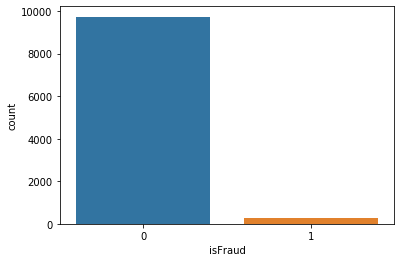

In [16]:
## target analysis
sns.countplot(df.isFraud)
## imbalanced/imbalanced  - imbalanced data

In [20]:
print(df[df.isFraud==0].shape[0]/df.shape[0]*100) # 97
print(df[df.isFraud==1].shape[0]/df.shape[0]*100) # ~3

97.34973497349735
2.6502650265026504


### univariate analysis



In [27]:
## missing values handling
mv = df.isnull().sum()
mvp = df.isnull().sum()/df.shape[0]*100

df_m = pd.concat([pd.DataFrame(mv,columns = ['count']),pd.DataFrame(mvp, columns = ['percentage'])], axis = 1)

df_m[df_m.percentage > 0 ].sort_values(by = 'percentage', ascending = False)
# df_m

,count,percentage
D7,9776,97.769777
D13,9719,97.199720
dist2,9621,96.219622
D12,9593,95.939594
D14,9549,95.499550
D6,9508,95.089509
D9,8899,88.998900
D8,8899,88.998900
R_emaildomain,8374,83.748375
D11,7723,77.237724


In [ ]:
### drop rows/columns where missing values are available
### handle missing values 